In [25]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from statistics import mean 

In [44]:
data_file = f"data/5_mr_50_cond/simulated_noNoise.txt"

data = pd.read_csv(data_file, sep = "\t", index_col=None) 

In [53]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,3.520,7.5700,6.78,4.5300,6.94,3.36,9.300,4.9600,8.75,8.040,...,3.31,10.80,9.23,8.21,12.60,11.50,9.89,13.00,10.30,11.80
1,4.770,2.5900,10.50,6.6900,5.19,4.64,10.200,3.8700,11.20,7.910,...,3.81,9.16,9.29,10.10,9.97,10.70,8.58,12.70,12.10,5.92
2,2.020,2.5100,7.57,3.8600,4.30,1.80,9.510,2.7200,5.83,3.970,...,2.23,10.40,4.57,9.03,9.17,7.60,7.95,9.82,4.08,5.53
3,5.690,7.7600,6.64,7.0300,6.07,4.47,11.700,5.2000,9.45,8.690,...,3.05,8.79,10.50,6.94,12.20,14.60,12.00,16.20,14.10,12.80
4,0.351,0.0534,5.96,0.0143,4.18,6.19,0.225,0.0447,0.00,0.646,...,3.27,5.35,1.11,5.57,3.18,3.37,9.51,1.78,1.13,4.21


In [46]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values.unique()

array([0])

In [54]:
# check summary statistics by row
data.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,8.025550,7.94950,6.027085,9.28450,3.332733,6.110673,6.305449,5.449835,4.545725,6.112350,...,5.015524,6.755265,8.400245,5.163870,6.844140,7.665270,4.846417,7.676480,8.293150,4.545635
std,3.811434,3.71315,3.265087,4.03505,3.122125,3.431277,3.468367,3.520335,3.366484,3.249804,...,3.395437,3.405183,3.971895,2.886027,3.767222,4.015026,3.128228,3.660779,3.796219,3.341633
min,1.570000,1.49000,0.756000,1.42000,0.000000,0.000000,0.014900,0.411000,0.045500,0.712000,...,0.070700,0.913000,0.809000,0.646000,0.788000,0.794000,0.049400,0.986000,1.660000,0.135000
25%,5.277500,5.19750,3.687500,6.40500,0.236000,3.510000,3.845000,2.627500,2.037500,3.610000,...,2.120000,4.217500,5.705000,2.677500,3.902500,4.677500,2.490000,5.140000,5.592500,1.842500
50%,7.500000,7.37000,5.115000,8.52500,3.080000,5.985000,6.005000,4.810000,3.945000,6.170000,...,4.695000,6.315000,7.705000,4.610000,6.200000,7.060000,4.530000,7.450000,7.865000,4.125000
75%,9.992500,10.22500,8.070000,11.60000,5.075000,8.280000,8.257500,7.650000,6.485000,8.222500,...,7.087500,8.882500,10.525000,7.147500,9.360000,9.545000,7.025000,9.487500,10.500000,6.372500
max,19.500000,21.40000,16.000000,23.00000,16.700000,15.600000,17.200000,17.000000,15.900000,16.300000,...,15.100000,18.000000,20.100000,13.500000,18.900000,23.400000,14.700000,19.500000,21.700000,15.600000


In [57]:
##data_l = data.div(data.sum(axis=1), axis=0)

##data_l.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,...,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000
std,0.002375,0.002335,0.002709,0.002173,0.004684,0.002808,0.002750,0.003230,0.003703,0.002658,...,0.003385,0.002520,0.002364,0.002794,0.002752,0.002619,0.003227,0.002384,0.002289,0.003676
min,0.000978,0.000937,0.000627,0.000765,0.000000,0.000000,0.000012,0.000377,0.000050,0.000582,...,0.000070,0.000676,0.000482,0.000625,0.000576,0.000518,0.000051,0.000642,0.001001,0.000148
25%,0.003288,0.003269,0.003059,0.003449,0.000354,0.002872,0.003049,0.002411,0.002241,0.002953,...,0.002113,0.003122,0.003396,0.002593,0.002851,0.003051,0.002569,0.003348,0.003372,0.002027
50%,0.004673,0.004636,0.004243,0.004591,0.004621,0.004897,0.004762,0.004413,0.004339,0.005047,...,0.004680,0.004674,0.004586,0.004464,0.004529,0.004605,0.004674,0.004852,0.004742,0.004537
75%,0.006225,0.006431,0.006695,0.006247,0.007614,0.006775,0.006548,0.007019,0.007133,0.006726,...,0.007066,0.006575,0.006265,0.006921,0.006838,0.006226,0.007248,0.006180,0.006331,0.007009
max,0.012149,0.013460,0.013273,0.012386,0.025055,0.012765,0.013639,0.015597,0.017489,0.013334,...,0.015053,0.013323,0.011964,0.013072,0.013807,0.015264,0.015166,0.012701,0.013083,0.017159


In [77]:
# check summary statistics by column
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.483616,3.578688,6.369580,4.786366,5.467940,5.917240,6.284340,2.466574,6.448160,4.038360,...,3.141000,8.146400,7.598000,7.576200,7.33580,9.277600,10.144600,10.021600,7.960400,7.281800
std,1.781800,2.031314,3.040953,2.430499,2.568214,2.602281,3.276548,1.303116,3.814274,2.345663,...,0.793037,1.817968,2.885936,2.398968,2.61434,2.712069,1.989103,3.832033,3.060829,2.204591
min,0.089800,0.053400,0.729000,0.014300,0.247000,0.672000,0.225000,0.044700,0.000000,0.638000,...,1.780000,4.990000,1.110000,2.660000,2.61000,3.370000,6.610000,1.150000,1.130000,2.800000
25%,2.077500,2.217500,4.082500,2.870000,4.165000,3.855000,3.875000,1.677500,3.485000,2.120000,...,2.560000,6.650000,5.617500,5.952500,5.37250,7.442500,8.580000,7.732500,5.470000,5.725000
50%,3.795000,3.530000,6.560000,4.395000,5.555000,5.940000,6.865000,2.380000,5.945000,3.710000,...,3.055000,8.120000,7.430000,7.705000,7.35500,9.505000,9.945000,10.750000,8.135000,7.080000
75%,4.795000,4.985000,8.882500,6.987500,7.210000,8.060000,8.787500,3.267500,9.445000,5.580000,...,3.635000,9.420000,9.792500,9.165000,9.20750,11.400000,11.950000,12.875000,10.300000,8.800000
max,6.500000,7.760000,11.700000,8.110000,11.200000,11.200000,11.700000,5.200000,13.800000,9.370000,...,6.260000,11.600000,13.400000,12.500000,12.60000,15.000000,13.800000,17.000000,14.100000,12.800000


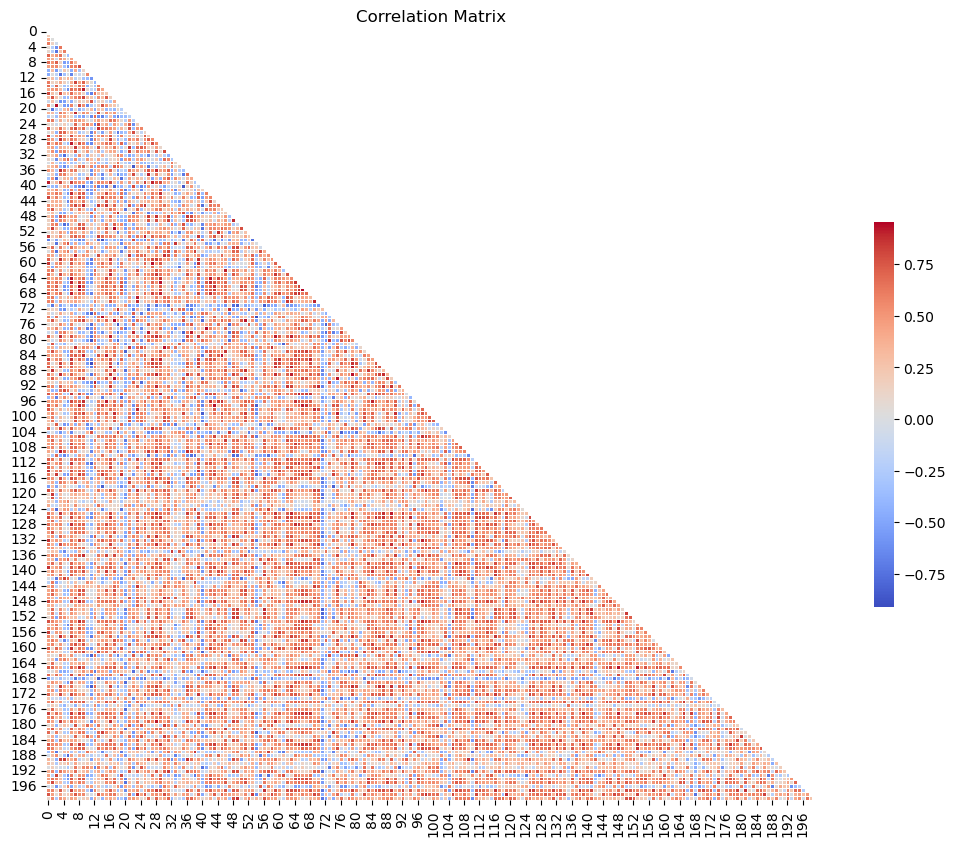

In [64]:
corr_mat = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Visualize correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=False, cmap='coolwarm', linewidths=.5, square=True,
            mask = mask, cbar_kws={"drawedges": False, "shrink": .5})
plt.title('Correlation Matrix')
plt.show()

In [74]:
# unit-variance normalization per-gene, i.e., the expression data across all conditions will have variance=1
data_n = pd.DataFrame(StandardScaler(with_mean=False).fit_transform(data.to_numpy()))

# check summary statistics by colum
data_n.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.974959,1.779646,2.115866,1.989287,2.150699,2.296952,1.937448,1.912045,1.707697,1.739107,...,4.000936,4.526541,2.659498,3.190171,2.834473,3.455588,5.151866,2.641768,2.627138,3.336550
std,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,...,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153,1.010153
min,0.050910,0.026555,0.242161,0.005943,0.097152,0.260857,0.069367,0.034651,0.000000,0.274753,...,2.267325,2.772690,0.388529,1.120067,1.008475,1.255209,3.356844,0.303149,0.372929,1.282971
25%,1.177793,1.102741,1.356137,1.192816,1.638215,1.496433,1.194654,1.300368,0.922949,0.912972,...,3.260871,3.695068,1.966271,2.506466,2.075875,2.772076,4.357295,2.038345,1.805241,2.623218
50%,2.151492,1.755434,2.179120,1.826629,2.184942,2.305787,2.116464,1.844934,1.574443,1.597700,...,3.891391,4.511872,2.600693,3.244405,2.841892,3.540286,5.050501,2.833780,2.684760,3.244084
75%,2.718420,2.478991,2.950615,2.904111,2.835901,3.128728,2.709167,2.532908,2.501365,2.403010,...,4.630183,5.234216,3.427630,3.859179,3.557677,4.246109,6.068726,3.393946,3.399266,4.032195
max,3.685032,3.858971,3.886540,3.370639,4.405283,4.347612,3.607084,4.030948,3.654720,4.035162,...,7.973849,6.445532,4.690349,5.263474,4.868502,5.586985,7.008236,4.481327,4.653364,5.865011


In [87]:
grn_file = f"data/5_mr_50_cond/bipartite_GRN.csv"

grn_df = pd.read_csv(grn_file, sep = ",", header = None)
grn_true = pd.Series(zip(*map(grn_df.get, grn_df)), name='edges').to_frame()
grn_true['class'] = 1

corr_mat = data_n.corr(method="pearson").abs().iloc[100:,:100]
corr_dict = corr_mat.unstack().to_dict()

grn_pred = pd.concat([pd.Series(corr_dict.keys(), name='edges'),  pd.Series(corr_dict.values(), name='corr')], axis=1)

grn_eval = pd.merge(grn_pred, grn_true, on='edges', how="left")
grn_eval['class'] = grn_eval['class'].fillna(int(0))

grn_eval.to_csv(r"results/5_mr_50_cond/top_corr.csv")

In [ ]:
print(metrics.roc_auc_score(grn_eval['class'], grn_eval['corr']))

roc_gene = [] 
for i in range(100):
    grn_eval_gene = grn_eval.iloc[i::100,:]
    roc_gene.append(metrics.roc_auc_score(grn_eval_gene['class'], grn_eval_gene['corr']))
    
print(mean(roc_gene))

0.6619815875877165
0.6725450267402954


In [105]:
genie_file = f"data/5_mr_50_cond/roc.txt"
with open(genie_file, 'r') as f:
    lines = f.readlines()
    
roc_genie =[float(e.strip()) for e in lines]

print(mean(roc_genie))

0.661429878034267
